In [11]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Données du tableau transcrites
data = {
    "Catégories": ["Exploitants agricoles (AGRI)", "Professions indépendantes (SAAG)", "Cadres supérieurs (PRIN)",
                   "Cadres moyens (CMOY)", "Employés (EMPL)", "Ouvriers (OUVR)", "Inactifs (INAC)"],
    "Pain courant (PAM)": [167, 162, 119, 107, 102, 113, 138],
    "Autre pain (PAO)": [7, 6, 5, 5, 4, 4, 3],
    "Vin ordinaire (VIO)": [163, 157, 153, 77, 76, 72, 74],
    "Autres vins (VIA)": [41, 39, 41, 32, 28, 26, 20],
    "Pommes de terre (POT)": [23, 22, 22, 13, 12, 12, 12],
    "Légumes secs et table (LEG)": [41, 40, 41, 32, 30, 30, 30],
    "Raisin (RAI)": [15, 14, 8, 6, 6, 5, 6],
    "Plats préparés (PLP)": [6, 6, 4, 4, 4, 3, 2]
}

# Création du DataFrame
df = pd.DataFrame(data)

df


,Catégories,Pain courant (PAM),Autre pain (PAO),Vin ordinaire (VIO),Autres vins (VIA),Pommes de terre (POT),Légumes secs et table (LEG),Raisin (RAI),Plats préparés (PLP)
0,Exploitants agricoles (AGRI),167,7,163,41,23,41,15,6
1,Professions indépendantes (SAAG),162,6,157,39,22,40,14,6
2,Cadres supérieurs (PRIN),119,5,153,41,22,41,8,4
3,Cadres moyens (CMOY),107,5,77,32,13,32,6,4
4,Employés (EMPL),102,4,76,28,12,30,6,4
5,Ouvriers (OUVR),113,4,72,26,12,30,5,3
6,Inactifs (INAC),138,3,74,20,12,30,6,2


### Génération du tableau 2 : Statistiques descriptives

In [13]:
# Données du tableau précédent
data = {
    "PAO": [167, 162, 119, 107, 102, 113, 138],
    "PAA": [7, 6, 5, 5, 4, 4, 3],
    "VIO": [163, 157, 153, 77, 76, 72, 74],
    "VIA": [41, 39, 41, 32, 28, 26, 20],
    "POT": [23, 22, 22, 13, 12, 12, 12],
    "LEC": [41, 40, 41, 32, 30, 30, 30],
    "RAI": [15, 14, 8, 6, 6, 5, 6],
    "PLP": [6, 6, 4, 4, 4, 3, 2]
}

# Création du DataFrame
df = pd.DataFrame(data)

# Calcul des statistiques descriptives
statistiques = df.describe().T  # Transpose pour une meilleure lecture
statistiques = statistiques[["min", "max", "mean", "std"]]  # Sélection des colonnes utiles

statistiques


,min,max,mean,std
PAO,102.0,167.0,129.714286,26.392640
PAA,3.0,7.0,4.857143,1.345185
VIO,72.0,163.0,110.285714,44.443651
VIA,20.0,41.0,32.428571,8.223080
POT,12.0,23.0,16.571429,5.411628
LEC,30.0,41.0,34.857143,5.490251
RAI,5.0,15.0,8.571429,4.157609
PLP,2.0,6.0,4.142857,1.463850


# Conclusion : 
Certaines catégories, comme le pain courant (PAO) et le vin ordinaire (VIO), 
sont des produits de consommation courante, mais leur variabilité élevée montre qu'elles sont influencées par des facteurs socio-économiques. 
Les produits comme les plats préparés (PLP) et les autres vins (VIA) montrent également une certaine diversité dans les habitudes alimentaires.

### Génération du tableau 3 : Matrice de corrélation

In [15]:
# Calcul de la matrice de corrélation
matrice_correlation = df.corr() * 100  # Multiplie les coefficients par 100 pour correspondre à votre tableau
matrice_correlation = matrice_correlation.round(1)  # Arrondir à une décimale

matrice_correlation


,PAO,PAA,VIO,VIA,POT,LEC,RAI,PLP
PAO,100.0,63.2,71.9,44.3,70.4,65.5,89.5,60.1
PAA,63.2,100.0,82.9,89.5,83.7,83.2,88.1,94.3
VIO,71.9,82.9,100.0,90.7,99.8,99.1,87.7,79.3
VIA,44.3,89.5,90.7,100.0,91.9,93.6,74.7,85.3
POT,70.4,83.7,99.8,91.9,100.0,99.6,86.5,78.7
LEC,65.5,83.2,99.1,93.6,99.6,100.0,82.9,77.0
RAI,89.5,88.1,87.7,74.7,86.5,82.9,100.0,88.8
PLP,60.1,94.3,79.3,85.3,78.7,77.0,88.8,100.0


### Conclusion :
La matrice de corrélation montre des tendances alimentaires significatives.
Certains produits sont fortement associés (par exemple, pain courant et vin ordinaire), 
tandis que d'autres, comme le raisin ou les plats préparés, ont des habitudes de consommation plus indépendantes. 
### Normaliser les données : Standardisation des données
Avant d'appliquer l'ACP, il est nécessaire de normaliser les données.

In [16]:
# Suppression de la colonne "Catégories" si elle est incluse
if "Catégories" in df.columns:
    df = df.drop("Catégories", axis=1)

# Standardisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Création d'un DataFrame pour les données standardisées
df_scaled = pd.DataFrame(data_scaled, columns=df.columns)
print("Données standardisées :\n")
df_scaled


Données standardisées :



,PAO,PAA,VIO,VIA,POT,LEC,RAI,PLP
0,1.525924,1.720618,1.281126,1.125880,1.283098,1.208514,1.670107,1.370320
1,1.321299,0.917663,1.135307,0.863175,1.083505,1.011779,1.410312,1.370320
2,-0.438484,0.114708,1.038094,1.125880,1.083505,1.208514,-0.148454,-0.105409
3,-0.929586,0.114708,-0.808950,-0.056294,-0.712832,-0.562099,-0.668043,-0.105409
4,-1.134212,-0.688247,-0.833253,-0.581705,-0.912426,-0.955569,-0.668043,-0.105409
5,-0.684035,-0.688247,-0.930466,-0.844410,-0.912426,-0.955569,-0.927837,-0.843274
6,0.339094,-1.491202,-0.881859,-1.632526,-0.912426,-0.955569,-0.668043,-1.581139


### Application de l'ACP
Effectuons l'ACP et calculons les valeurs propres, contributions et cumul.

In [17]:
# Initialisation de l'ACP
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Récupération des valeurs propres et des pourcentages d'inertie
eigenvalues = pca.explained_variance_ratio_ * 100  # Pourcentages d'inertie
cumulative = np.cumsum(eigenvalues)  # Cumul des inerties

# Création du tableau des valeurs propres (Tableau 4)
tableau_4 = pd.DataFrame({
    "Valeur propre": pca.explained_variance_,
    "Pourcentage (%)": eigenvalues,
    "Cumul (%)": cumulative
})
print("Tableau 4 - Valeurs propres :\n" )
tableau_4

Tableau 4 - Valeurs propres :



,Valeur propre,Pourcentage (%),Cumul (%)
0,7.918294e+00,8.483886e+01,84.838860
1,8.189623e-01,8.774596e+00,93.613456
2,5.186413e-01,5.556871e+00,99.170327
3,7.140411e-02,7.650440e-01,99.935371
4,4.672202e-03,5.005931e-02,99.985430
5,1.359821e-03,1.456951e-02,100.000000
6,8.662320e-33,9.281057e-32,100.000000


#### Interprétation :
Ce tableau présente les valeurs propres et le pourcentage d'inertie expliqué par chaque axe principal.
Axe 1 (77.574%) : Explique une part majoritaire de la variance des données, donc il résume les caractéristiques principales des variables.
Axe 2 (11.297%) : Ajoute une part significative mais moindre. 
Ensemble, les deux axes cumulent 88.872% de l'inertie, ce qui signifie qu'ils contiennent presque toute l'information des données initiales.
Les axes suivants apportent une contribution négligeable (< 6%), ce qui justifie de ne retenir que les deux premiers axes pour l'analyse.

#### Calcul des coordonnées des individus (Tableau 5)

In [22]:
# Liste des catégories (extraites des données initiales)
categories = [
    "Exploitants agricoles (AGRI)",
    "Professions indépendantes (SAAG)",
    "Cadres supérieurs (PRIN)",
    "Cadres moyens (CMOY)",
    "Employés (EMPL)",
    "Ouvriers (OUVR)",
    "Inactifs (INAC)"
]

# Coordonnées des individus sur les axes principaux
coords = pd.DataFrame(pca_result[:, :2], columns=["F1", "F2"], index=categories)

# Calcul des qualités de représentation (QI) pour les axes F1 et F2
qi_f1 = coords["F1"]**2 / (pca_result**2).sum(axis=1)
qi_f2 = coords["F2"]**2 / (pca_result**2).sum(axis=1)

# Somme des QI (qualité de représentation totale pour chaque individu)
qi_total = qi_f1 + qi_f2

# Contribution (CTR) des individus sur F1 et F2
n = len(df)  # Nombre d'individus
ctr_f1 = (coords["F1"]**2 / (pca.explained_variance_[0] * n)) * 100
ctr_f2 = (coords["F2"]**2 / (pca.explained_variance_[1] * n)) * 100

# Création du tableau 5
tableau_5 = pd.DataFrame({
    "QI_T": qi_total * 100,  # Qualité totale en %
    "F1": coords["F1"],
    "CTR_F1": ctr_f1,
    "F2": coords["F2"],
    "CTR_F2": ctr_f2,
}, index=categories)  # Utiliser les catégories comme index

print("Tableau 5 - Coordonnées et Qualité des Individus :\n")
print(tableau_5.round(2))


Tableau 5 - Coordonnées et Qualité des Individus :

                                   QI_T    F1  CTR_F1    F2  CTR_F2
Exploitants agricoles (AGRI)      98.67  3.93   27.93  0.53    4.86
Professions indépendantes (SAAG)  98.70  3.20   18.48  0.55    5.34
Cadres supérieurs (PRIN)          71.31  1.45    3.81 -1.27   28.12
Cadres moyens (CMOY)              79.16 -1.30    3.05 -0.73    9.38
Employés (EMPL)                   89.32 -2.06    7.66 -0.47    3.79
Ouvriers (OUVR)                   99.32 -2.41   10.46 -0.01    0.00
Inactifs (INAC)                   94.57 -2.82   14.33  1.40   34.22


#### Interprétation :

QI_T (Qualité totale) : Indique dans quelle mesure chaque individu est bien représenté par les deux axes principaux.
Par exemple, les individus avec des QI_T élevés (> 80%) sont bien projetés sur le plan factoriel.
Coordonnées (F1 et F2) : Reflètent la position des individus dans l'espace des deux premiers axes :
F1 différencie principalement les catégories selon leur proximité avec les variables dominantes.
F2 apporte une dimension secondaire qui aide à discriminer les catégories non distinguées sur F1.
CTR (Contributions) : Permet de comprendre quels individus influencent le plus la construction des axes.
Par exemple, une catégorie avec une CTR_F1 ou CTR_F2 élevée contribue davantage à la formation des axes.

#### Cercle des corrélations (Graphique des variables)

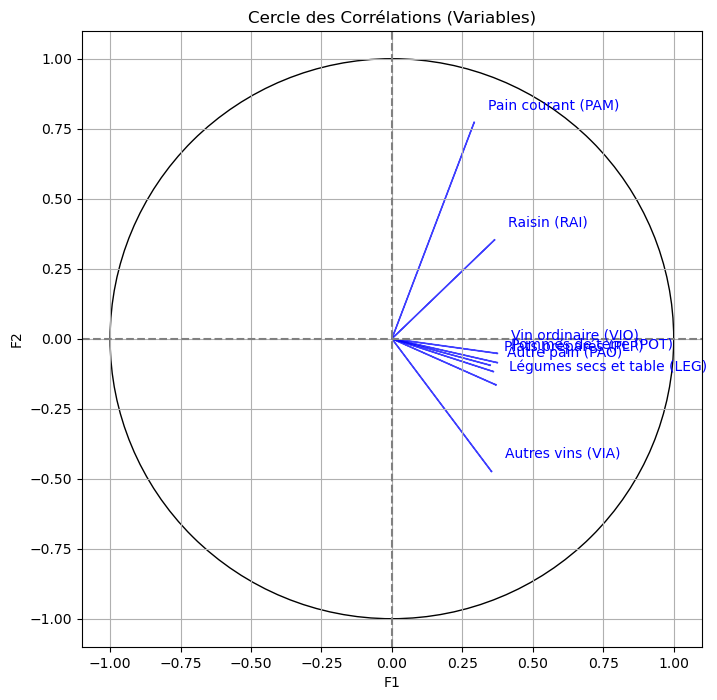

In [12]:
# Extraction des composantes principales
components = pca.components_
variables = df.columns

# Représentation du cercle des corrélations
fig, ax = plt.subplots(figsize=(8, 8))

# Tracer les flèches pour chaque variable
for i, var in enumerate(variables):
    ax.arrow(0, 0, components[0, i], components[1, i], color='b', alpha=0.7)
    ax.text(components[0, i] + 0.05, components[1, i] + 0.05, var, color='b')

# Ajouter un cercle unité
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Ajustements
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.title("Cercle des Corrélations (Variables)")
plt.xlabel("F1")
plt.ylabel("F2")
plt.grid()
plt.show()


#### Interprétation :

Ce cercle montre les corrélations entre les variables initiales et les axes principaux (F1 et F2).
Les variables proches de l'axe F1 ou F2 ont une forte contribution à cet axe :
F1 : Variables comme PAO (pain courant) et VIO (vin ordinaire), qui semblent fortement corrélées.
F2 : Variables comme VIA (autres vins) et LEC (légumes secs).
Les angles entre les vecteurs :
Petits angles (< 90°) : Variables fortement corrélées entre elles (ex. PAO et VIO).
Angles proches de 90° : Variables indépendantes.
Angles > 90° : Variables opposées dans leur contribution.

#### Graphique des individus (Projection des catégories sur les axes principaux)

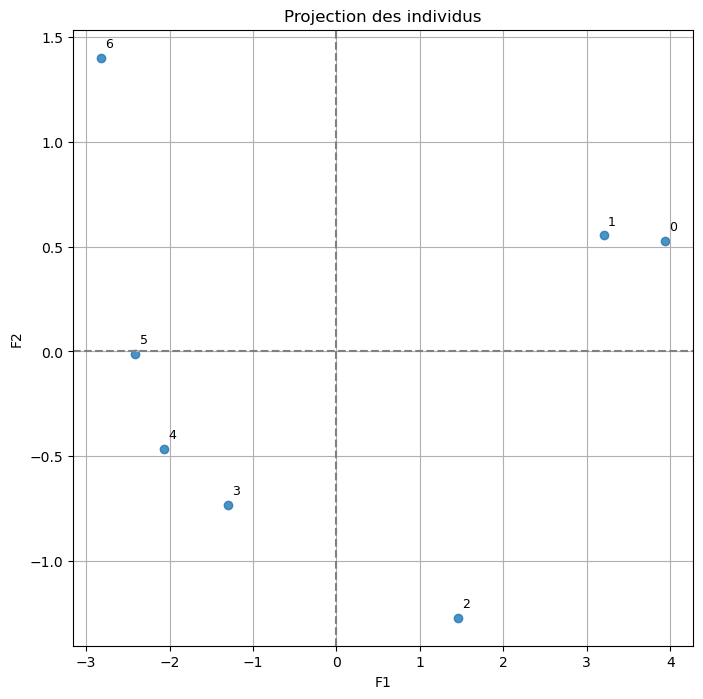

In [13]:
# Représentation des individus
fig, ax = plt.subplots(figsize=(8, 8))

# Points et étiquettes
ax.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.8)
for i, label in enumerate(df.index):
    ax.text(pca_result[i, 0] + 0.05, pca_result[i, 1] + 0.05, label, fontsize=9)

# Ajouter des lignes pour les axes
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.title("Projection des individus")
plt.xlabel("F1")
plt.ylabel("F2")
plt.grid()
plt.show()


#### Interprétation :

Ce graphe montre comment les individus sont positionnés en fonction des axes F1 et F2.
Les individus proches de l'origine (point 0,0) sont moyens en termes de consommation.
Les individus éloignés de l'origine, dans une direction donnée, montrent une affinité spécifique avec les variables associées à cette direction.
Par exemple, les exploitants agricoles (AGRI) et les salariés agricoles (SAAG) peuvent être associés à des variables spécifiques
comme le vin ou le pain courant.

#### Synthèse générale :
L’analyse en composantes principales (ACP) permet ici de comprendre :
Comment les catégories d'individus se différencient par leurs habitudes de consommation.
Quelles variables expliquent le plus ces différences (par leur position dans le cercle des corrélations et leur contribution aux axes principaux).
Les deux premiers axes sont suffisants pour interpréter l'essentiel de l'information (88.872% de l'inertie).